In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
data_dir = "Desktop/LeafDiseaseDetection/Tomatoleaf"

In [3]:
img_size = 128
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 6065 images belonging to 5 classes.
Found 1514 images belonging to 5 classes.


In [4]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint("plant_disease_model.h5", save_best_only=True)
]

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15,
    callbacks=callbacks
)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 888ms/step - accuracy: 0.4848 - loss: 1.2412

190/190 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.4857 - loss: 1.2394 - val_accuracy: 0.8309 - val_loss: 0.4292
Epoch 2/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.8254 - loss: 0.4705

190/190 ━━━━━━━━━━━━━━━━━━━━ 71s 373ms/step - accuracy: 0.8255 - loss: 0.4704 - val_accuracy: 0.8633 - val_loss: 0.3278
Epoch 3/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.8550 - loss: 0.3989

190/190 ━━━━━━━━━━━━━━━━━━━━ 74s 387ms/step - accuracy: 0.8551 - loss: 0.3986 - val_accuracy: 0.8943 - val_loss: 0.2612
Epoch 4/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 72s 377ms/step - accuracy: 0.8883 - loss: 0.2994 - val_accuracy: 0.8923 - val_loss: 0.2957
Epoch 5/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.8868 - loss: 0.3221

190/190 ━━━━━━━━━━━━━━━━━━━━ 77s 404ms/step - accuracy: 0.8868 - loss: 0.3220 - val_accuracy: 0.9095 - val_loss: 0.2385
Epoch 6/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.9132 - loss: 0.2325

190/190 ━━━━━━━━━━━━━━━━━━━━ 71s 375ms/step - accuracy: 0.9132 - loss: 0.2325 - val_accuracy: 0.9240 - val_loss: 0.2011
Epoch 7/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.9180 - loss: 0.2349

190/190 ━━━━━━━━━━━━━━━━━━━━ 76s 401ms/step - accuracy: 0.9180 - loss: 0.2350 - val_accuracy: 0.9247 - val_loss: 0.1991
Epoch 8/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 70s 367ms/step - accuracy: 0.9256 - loss: 0.2106 - val_accuracy: 0.9089 - val_loss: 0.2422
Epoch 9/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.9283 - loss: 0.1912

190/190 ━━━━━━━━━━━━━━━━━━━━ 69s 360ms/step - accuracy: 0.9283 - loss: 0.1912 - val_accuracy: 0.9485 - val_loss: 0.1498
Epoch 10/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.9382 - loss: 0.1662

190/190 ━━━━━━━━━━━━━━━━━━━━ 68s 359ms/step - accuracy: 0.9382 - loss: 0.1662 - val_accuracy: 0.9590 - val_loss: 0.1373
Epoch 11/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 69s 364ms/step - accuracy: 0.9412 - loss: 0.1660 - val_accuracy: 0.9498 - val_loss: 0.1556
Epoch 12/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 72s 380ms/step - accuracy: 0.9446 - loss: 0.1483 - val_accuracy: 0.9234 - val_loss: 0.1971
Epoch 13/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.9431 - loss: 0.1653

190/190 ━━━━━━━━━━━━━━━━━━━━ 71s 372ms/step - accuracy: 0.9431 - loss: 0.1652 - val_accuracy: 0.9584 - val_loss: 0.1182
Epoch 14/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 71s 376ms/step - accuracy: 0.9476 - loss: 0.1441 - val_accuracy: 0.9584 - val_loss: 0.1338
Epoch 15/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 73s 381ms/step - accuracy: 0.9646 - loss: 0.1041 - val_accuracy: 0.9320 - val_loss: 0.1677


In [10]:
from sklearn.metrics import classification_report
import numpy as np

In [11]:
y_pred_probs = model.predict(val_gen)
y_pred = np.argmax(y_pred_probs, axis=1)

y_true = val_gen.classes

class_names = list(val_gen.class_indices.keys())

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))
plt.show()

48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step

Classification Report:

                         precision    recall  f1-score   support

Tomato___Bacterial_spot       0.27      0.28      0.27       425
  Tomato___Early_blight       0.12      0.12      0.12       200
   Tomato___Late_blight       0.25      0.24      0.25       381
     Tomato___Leaf_Mold       0.12      0.12      0.12       190
       Tomato___healthy       0.20      0.21      0.20       318

               accuracy                           0.21      1514
              macro avg       0.19      0.19      0.19      1514
           weighted avg       0.21      0.21      0.21      1514



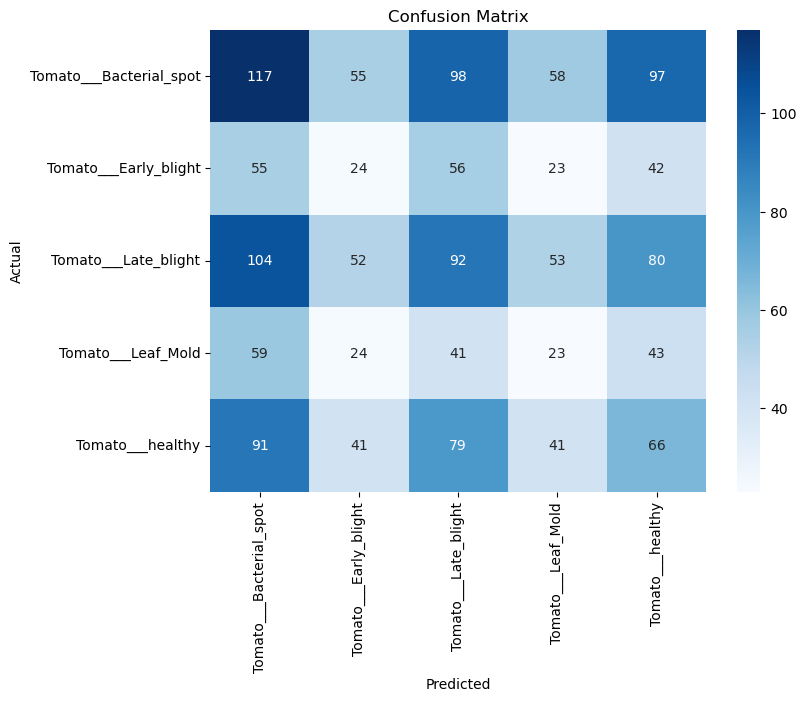

In [12]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [8]:
import json
with open("class_indices.json", "w") as f:
    json.dump(train_gen.class_indices, f)